In [19]:
import torch
import glob
import os

from src.models import SimpleLinear
from src.metrics import plot_weights_heatmap
model = SimpleLinear()

# Define the directories
central_dir = "./results/concept_shift_on_features_central"
client_dir = "./results/concept_shift_on_features_client"
server_dir = "./results/server"

# Function to load .pth files from a directory into a dictionary
def load_pth_files(directory):
    pth_files = glob.glob(directory + "*.pth")
    models_dict = {}
    for pth_file in pth_files:
        filename = os.path.basename(pth_file)[:-4]  # Remove ".pth" extension
        model = torch.load(pth_file)
        models_dict[filename] = model
    return models_dict

# Load models from each directory
central_models_dict = load_pth_files(central_dir)
client_models_dict = load_pth_files(client_dir)
#server_models_dict = load_pth_files(server_dir)


In [2]:
central_models_dict.keys()

dict_keys(['concept_shift_on_features_central240_centralized_model', 'concept_shift_on_features_central240_federated_model', 'concept_shift_on_features_central240_Federated_model_heterogeneity_0', 'concept_shift_on_features_central240_Federated_model_heterogeneity_180', 'concept_shift_on_features_central240_Federated_model_heterogeneity_270', 'concept_shift_on_features_central240_Federated_model_heterogeneity_90', 'concept_shift_on_features_central240_personalized_centralized_model_heterogeneity_0_', 'concept_shift_on_features_central240_personalized_centralized_model_heterogeneity_180_', 'concept_shift_on_features_central240_personalized_centralized_model_heterogeneity_270_', 'concept_shift_on_features_central240_personalized_centralized_model_heterogeneity_90_', 'concept_shift_on_features_central48_centralized_model', 'concept_shift_on_features_central48_federated_model', 'concept_shift_on_features_central48_Federated_model_heterogeneity_0', 'concept_shift_on_features_central48_Feder

In [4]:
import pickle
import pandas as pd
df = pd.read_pickle('./results/concept_shift_on_features_client48_client_weights.pkl')
cluster = df['cluster']
df.drop(columns='cluster')

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import manifold
import sklearn.manifold._t_sne as tsne
import numpy as np
X = df
y= cluster
tsne = manifold.TSNE(n_components=2, random_state=42)
mnist_tr = tsne.fit_transform(X)
# create dataframe
tsne_df = pd.DataFrame(columns=['CP1', 'CP2', 'target'],
                       data=np.column_stack((mnist_tr, 
                                            cluster)))
# cast targets column to int
tsne_df.loc[:, 'target'] = tsne_df.target.astype(int)
grid = sns.FacetGrid(tsne_df, hue="target")
grid.map(plt.scatter, 'CP1', 'CP2').add_legend()

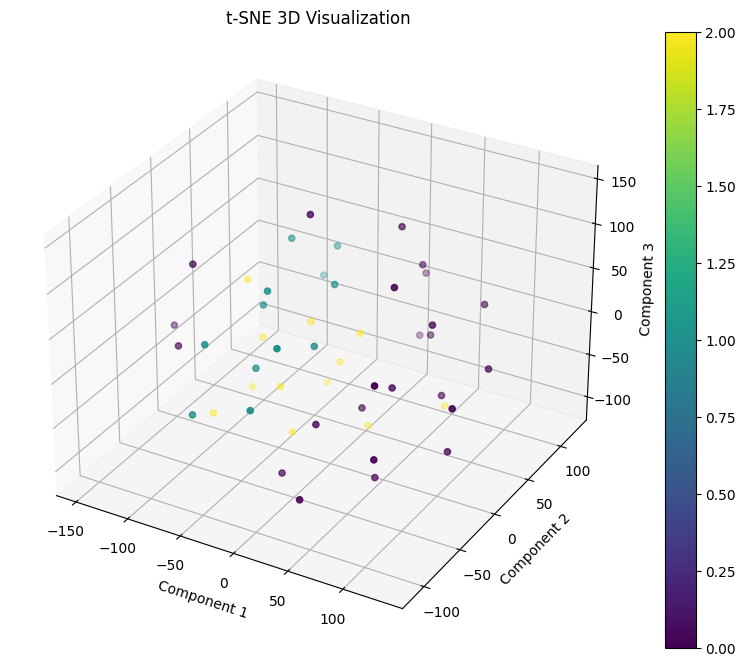

In [18]:
X = df
y= cluster
tsne = manifold.TSNE(n_components=3, random_state=42)
mnist_tr = tsne.fit_transform(X)
# create dataframe
tsne_df = pd.DataFrame(columns=['CP1', 'CP2','CP3' ,'target'],
                       data=np.column_stack((mnist_tr, 
                                            cluster)))
# cast targets column to int
tsne_df.loc[:, 'target'] = tsne_df.target.astype(int)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot using Matplotlib directly
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
scatter = ax.scatter(tsne_df['CP1'], tsne_df['CP2'], tsne_df['CP3'], c=tsne_df['target'], cmap='viridis')

# Set labels and title
ax.set_xlabel('Component 1')
ax.set_ylabel('Component 2')
ax.set_zlabel('Component 3')
ax.set_title('t-SNE 3D Visualization')

# Add color bar
plt.colorbar(scatter)

plt.show()


In [2]:
import torch
from sklearn.metrics.pairwise import cosine_similarity

def flatten_weights(model):
    flattened_weights = []
    for param in model.parameters():
        flattened_weights.extend(param.data.flatten().numpy())
    return flattened_weights

def calculate_cosine_similarity(model1, model2):
    # Flatten the weights of both models
    weights1 = flatten_weights(model1)
    weights2 = flatten_weights(model2)
    
    # Calculate the cosine similarity between the flattened weights
    similarity = cosine_similarity([weights1], [weights2])[0][0]
    return similarity

# Example usage:
# Assuming you have two models named 'model1' and 'model2'
# similarity = calculate_cosine_similarity(model1, model2)


In [3]:
import json
# Load client_01.json
with open("./results/01.json", "r") as f:
    central_data = json.load(f)
# Load client_01.json
with open("./results/client_01.json", "r") as f:
    client_data = json.load(f)

# Load server_01.json
with open("./results/server_01.json", "r") as f:
    server_data = json.load(f)

In [4]:
central_models_dict.keys()


dict_keys(['01_centralized_model', '01_federated_model', '01_Federated_model_heterogeneity_dilatation', '01_Federated_model_heterogeneity_erosion', '01_Federated_model_heterogeneity_none', '01_personalized_centralized_model_heterogeneity_dilatation_', '01_personalized_centralized_model_heterogeneity_erosion_', '01_personalized_centralized_model_heterogeneity_none_'])

In [5]:
model = SimpleLinear()
model2 = SimpleLinear()
model.load_state_dict(central_models_dict['01_federated_model'])
model2.load_state_dict(central_models_dict['01_centralized_model'])
calculate_cosine_similarity(model,model2)

0.012677212

In [9]:
pytorch_total_params = sum(p.numel() for p in model.parameters())

In [10]:
pytorch_total_params

159010

In [ ]:
model = SimpleLinear()
model2 = SimpleLinear()
model.load_state_dict(central_models_dict['01_Federated_model_heterogeneity_dilatation'])
model2.load_state_dict(central_models_dict['01_personalized_centralized_model_heterogeneity_dilatation_'])
calculate_cosine_similarity(model,model2)

0.010969089

In [ ]:
model = SimpleLinear()
model2 = SimpleLinear()
model.load_state_dict(central_models_dict['01_Federated_model_heterogeneity_erosion'])
model2.load_state_dict(central_models_dict['01_personalized_centralized_model_heterogeneity_erosion_'])
calculate_cosine_similarity(model,model2)

0.05739273

In [ ]:
model = SimpleLinear()
model2 = SimpleLinear()
model.load_state_dict(central_models_dict['01_Federated_model_heterogeneity_none'])
model2.load_state_dict(central_models_dict['01_personalized_centralized_model_heterogeneity_none_'])
calculate_cosine_similarity(model,model2)

0.025320502

In [ ]:
client_models_dict.keys()

dict_keys(['client_01_client_model_cluster_0', 'client_01_client_model_cluster_1', 'client_01_client_model_cluster_2'])

In [ ]:
server_models_dict.keys()

dict_keys(['server_01_server_model_cluster_0', 'server_01_server_model_cluster_1', 'server_01_server_model_cluster_2'])

In [6]:
import matplotlib.pyplot as plt
def plot_weights_heatmap(model,title,title2 = '', v_value=0.1 ):
    # Get the weights of the first and second layers
    first_layer_weights = model.fc1.weight.data.numpy()
    second_layer_weights = model.fc2.weight.data.numpy()

    # Create custom colormap
    cmap = 'coolwarm'

    # Plot the input weights of the first layer
    plt.figure(figsize=(10, 12))

    plt.subplot(2, 1, 1)
    plt.imshow(first_layer_weights, cmap=cmap, aspect='auto', vmin=-v_value, vmax=v_value)
    plt.title(title)
    plt.xlabel('Input Pixel (784)')
    plt.ylabel('Neuron in Hidden Layer (200)')
    plt.colorbar(label='Weight Value')

    # Plot the output weights of the second layer
    plt.subplot(2, 1, 2)
    plt.imshow(second_layer_weights, cmap=cmap, aspect='auto', vmin=-v_value, vmax=v_value)
    plt.title(title2)
    plt.xlabel('Neuron in Hidden Layer(200)')
    plt.ylabel('Output Neuron (10)')
    plt.colorbar(label='Weight Value')

    plt.tight_layout()
    plt.savefig(title + '.jpg')  
    plt.show()

In [10]:
central_data

{'seed': 42,
 'number_of_clients': 48,
 'number_of_samples_of_each_labels_by_clients': 10,
 'centralized_model_epochs': 150,
 'federated_rounds': 50,
 'federated_local_epochs': 30,
 'number_of_clusters': 3,
 'output': '01',
 'heterogeneity': 'features_distribution_skew',
 'type': 'central',
 'central': 83.47222222222223,
 'personalized central (none)': 87.08333333333333,
 'federated  none': 86.45833333333334,
 'personalized central (erosion)': 72.29166666666667,
 'federated  erosion': 67.70833333333334,
 'personalized central (dilatation)': 87.5,
 'federated  dilatation': 87.08333333333333,
 'federated': 76.18055555555556,
 'federated std': 14.320885798781038}

In [11]:
key_list =[]
for key in central_models_dict.keys() :
    key_list.append(key)

In [12]:
key_list

['01_centralized_model',
 '01_federated_model',
 '01_Federated_model_heterogeneity_dilatation',
 '01_Federated_model_heterogeneity_erosion',
 '01_Federated_model_heterogeneity_none',
 '01_personalized_centralized_model_heterogeneity_dilatation_',
 '01_personalized_centralized_model_heterogeneity_erosion_',
 '01_personalized_centralized_model_heterogeneity_none_']

In [ ]:
for key in key_list :
    model.load_state_dict(central_models_dict[key])
    plot_weights_heatmap(model,key)
    


In [30]:
client_data

{'seed': 42,
 'number_of_clients': 48,
 'number_of_samples_of_each_labels_by_clients': 10,
 'federated_rounds': 50,
 'federated_local_epochs': 30,
 'number_of_clusters': 3,
 'output': 'client_01',
 'heterogeneity': 'features_distribution_skew',
 'type': 'client_side',
 'silhouette': 0.953708374387527,
 'avg_intra_dist': 0.21771033793913883,
 'duhn_index': 11.070484913283995,
 'davies_bouldin_index': 0.06806908976909647,
 'Cluster 0': {'num_members': 31,
  'accuracy': 90.10752688172043,
  'std': 4.971883020084682,
  'members_heterogeneity': {'dilatation': 16, 'none': 15}},
 'Cluster 1': {'num_members': 13,
  'accuracy': 54.61538461538461,
  'std': 9.743589743589745,
  'members_heterogeneity': {'erosion': 12, 'none': 1}},
 'Cluster 2': {'num_members': 4,
  'accuracy': 50.0,
  'std': 4.08248290463863,
  'members_heterogeneity': {'erosion': 4}}}

In [ ]:
for key in client_models_dict.keys() :
    model = SimpleLinear()
    cluster_id = int(key[-1])
    model.load_state_dict(client_models_dict[key])
    title2= str(client_data[f'Cluster {cluster_id}'])
    plot_weights_heatmap(model,key, title2)

In [ ]:
for key in server_models_dict.keys() :
    model = SimpleLinear()
    cluster_id = int(key[-1])
    model.load_state_dict(server_models_dict[key])
    title2= str(server_data[f'Cluster {cluster_id}'])
    plot_weights_heatmap(model,key, title2)

In [36]:
import torch
from sklearn.metrics.pairwise import cosine_similarity

def flatten_weights(model):
    flattened_weights = []
    for param in model.parameters():
        flattened_weights.extend(param.data.flatten().numpy())
    return flattened_weights

def calculate_cosine_similarity(model1, model2):
    # Flatten the weights of both models
    weights1 = flatten_weights(model1)
    weights2 = flatten_weights(model2)
    
    # Calculate the cosine similarity between the flattened weights
    similarity = cosine_similarity([weights1], [weights2])[0][0]
    return similarity

# Example usage:
# Assuming you have two models named 'model1' and 'model2'
# similarity = calculate_cosine_similarity(model1, model2)


In [ ]:
calculate_cosine_similarity(model)